In [683]:
# Standard DS imports
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Inferential Analysis Tests
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Machine learning imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, explained_variance_score, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

# Machine Learning Algorithms
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, ExtraTreesRegressor

#data balancing
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


In [508]:
#Read in file, inspect dataframe head

df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [509]:
#Inspect data types and if any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [510]:
#Confirm if any nulls
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [511]:
#look for any anomolies in the data
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [512]:
df.duplicated().sum()

4

In [513]:
# Encode Data in a df_copy so that it will be easier to work with for machine learning later on.
df_copy = df.copy()

df_copy.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df_copy.day.replace(('sun','mon','tue','wed','thu','fri','sat'),(1,2,3,4,5,6,7), inplace=True)

In [514]:
df_copy['log_burned_area'] = np.log1p(df_copy['area'])

In [515]:
df_sorted = df_copy.sort_values(by='month')

In [516]:
df_sorted

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_burned_area
104,2,4,1,7,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,0.000000
379,4,5,1,1,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0.000000
96,3,4,2,7,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,0.000000
59,2,2,2,6,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,0.000000
202,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,2.642622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,12,4,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,2.500616
281,6,5,12,3,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,3.249211
273,4,6,12,1,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,2.300583
279,4,4,12,2,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,2.376764


In [517]:
df_sorted.duplicated().sum()

4

In [331]:
# #For testing
# df_copy_2 = df.copy()
# df_copy_2['log_burned_area'] = np.log1p(df_copy['area'])

In [519]:
df_copy['area'].value_counts()

area
0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: count, Length: 251, dtype: int64

In [520]:
df_copy.shape

(517, 14)

In [521]:
df_copy.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'log_burned_area'],
      dtype='object')

In [523]:
# Define the damage categories
def categorize_damage(area):
    if area == 0:
        return 'No Damage'
    elif area <= 1:
        return 'Low Damage'
    elif area <= 10:
        return 'Moderate Damage'
    else:
        return 'High Damage'

# Apply the function to create a new column 'damage_category'
df_copy['damage_category'] = df_copy['area'].apply(categorize_damage)

### Definitions to get familiar with the domain I'm working in - these are all relative measures for forest fire

Duff Moisture Code (DMC) is a numeric rating that measures the average moisture content of loosely compacted organic layers that are moderately deep

Drought code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

ISI index is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account.

FFMC represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101.

(RH) is the ratio of the amount of moisture in the air to the amount of moisture necessary to saturate the air at the same temperature and pressure. Relative humidity is expressed in percent.

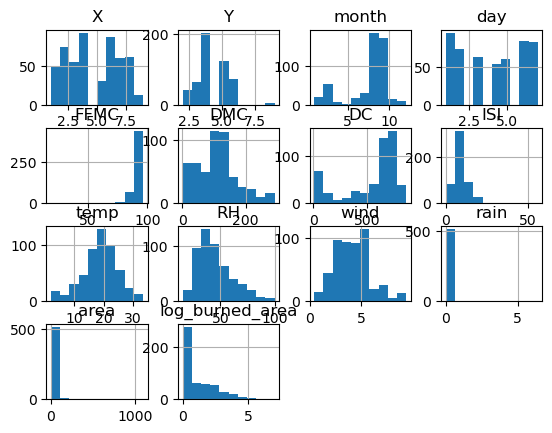

In [525]:
# Checking distributions of data to see if gaussian or any skews.
df_copy.hist();

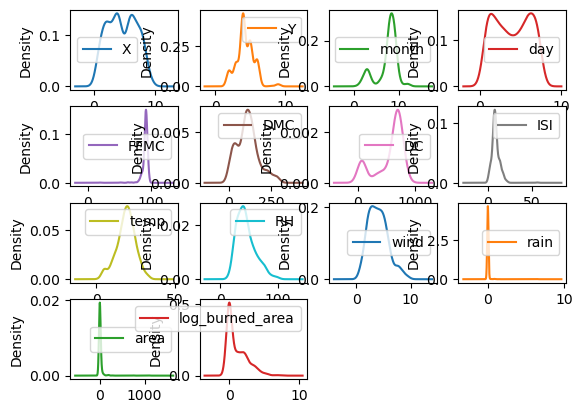

In [526]:
#Distributions look for the most part positively skewed.
df_copy.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False);

<Axes: >

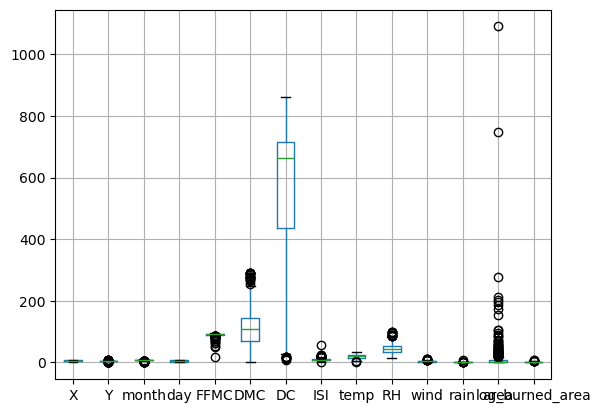

In [527]:
df_copy.boxplot()

# Section 1: Descriptive Questions

### Which month has the highest Drought Code?

Answer: September appears to have the highest Drought Code value, of roughly ~750

In [528]:
def plot_descriptive(x, y, title, df=df):
    Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    sns.barplot(df, x=df[x], y=df[y], order=Months, palette="Set1" )
    plt.title(title);

def plot_scatter(x, y, z, title, df=df):
    sns.scatterplot(df, x=df[x], y=df[y], hue=z)
    plt.title(title);


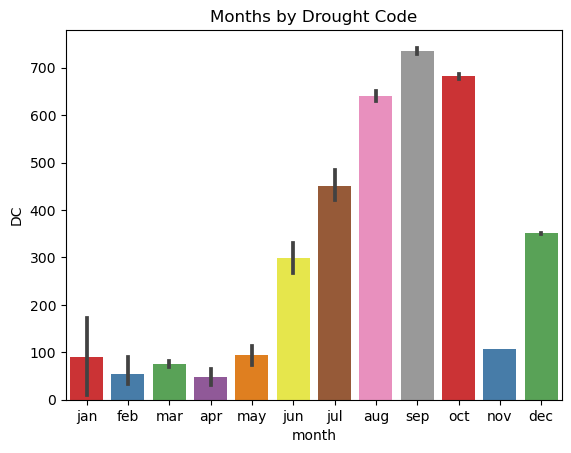

In [529]:
plot_descriptive("month", "DC", "Months by Drought Code")
# sns.barplot(df, x=df['month'], y=df['DC'] )
# plt.title("Months by Drought Code");

### Which month has the highest temp?
Answer: July

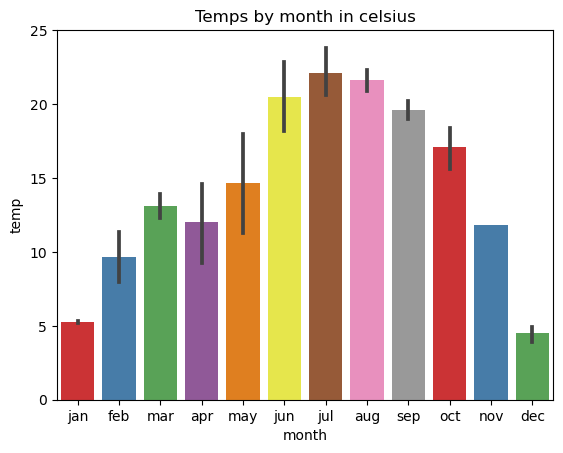

In [530]:
plot_descriptive("month", "temp", "Temps by month in celsius")

## Which Month has high ISI index? 

ISI is numeric rating of the expected rate of fire spread. June, Juily, August have highest, with June having the highest. Subsequently, June has nearly the highest temperatures year round with relativley low moisture rating

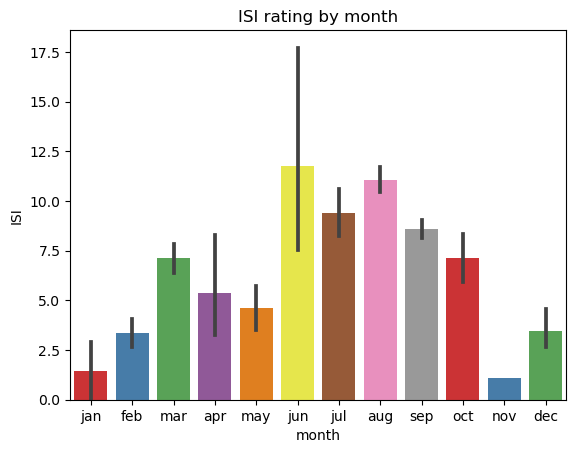

In [531]:
plot_descriptive("month", "ISI", "ISI rating by month")

## What months have a lot of rain?

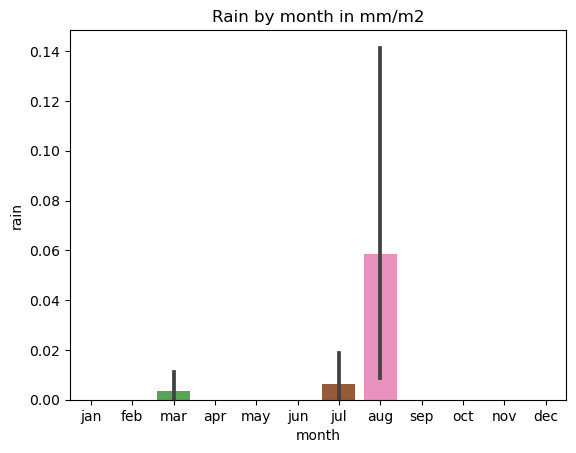

In [532]:
plot_descriptive("month", "rain", "Rain by month in mm/m2")

### What does wind speed look like for months?

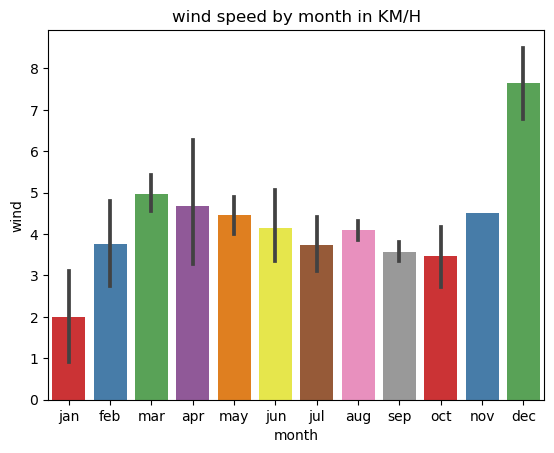

In [533]:
plot_descriptive("month", "wind", "wind speed by month in KM/H")

### Let's inspect if there are any relationships between certain continuous ratings!

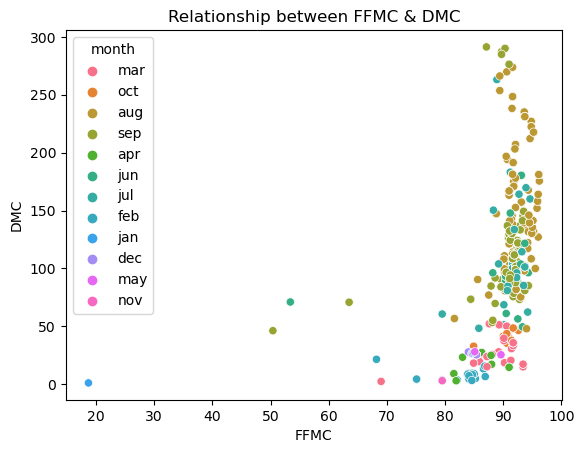

In [534]:
plot_scatter("FFMC", "DMC", "month", "Relationship between FFMC & DMC" )

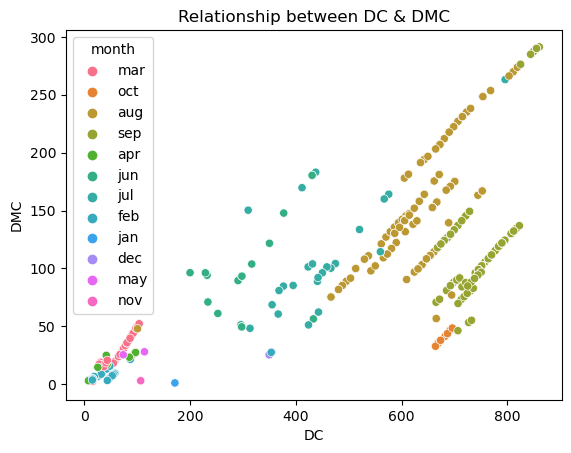

In [535]:
plot_scatter("DC", "DMC", "month", "Relationship between DC & DMC" )

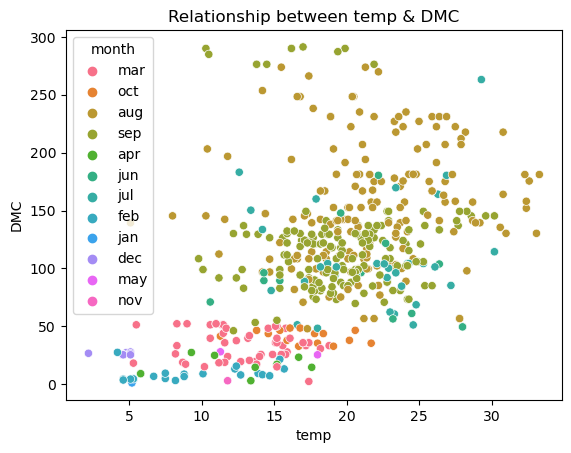

In [536]:
plot_scatter("temp", "DMC", "month", "Relationship between temp & DMC" )

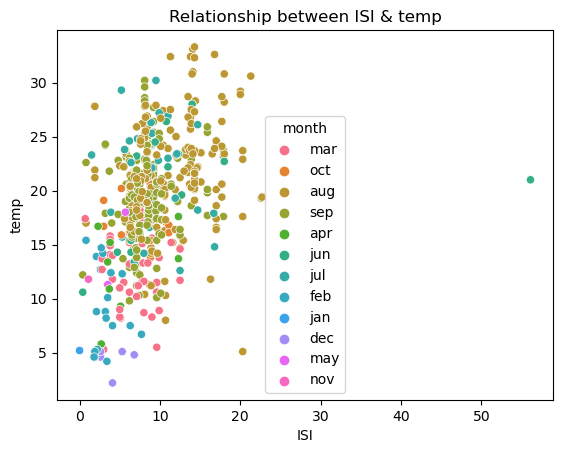

In [537]:
#Relationship between ISI index and DMC
plot_scatter("ISI", "temp", "month", "Relationship between ISI & temp" )

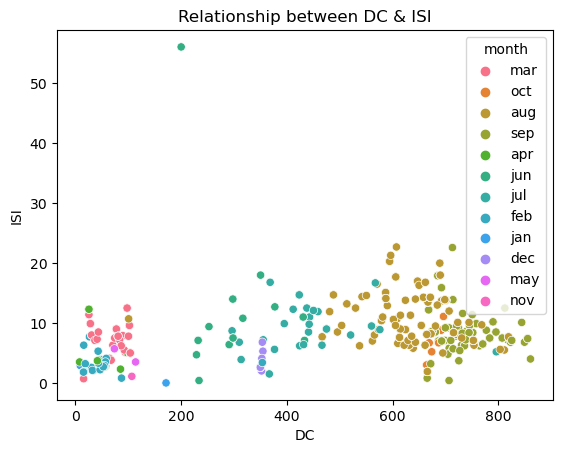

In [538]:
plot_scatter("DC", "ISI", "month", "Relationship between DC & ISI")

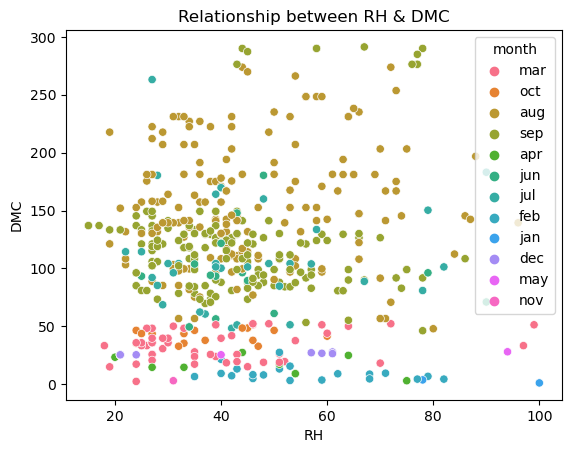

In [539]:
plot_scatter("RH", "DMC", "month", "Relationship between RH & DMC")

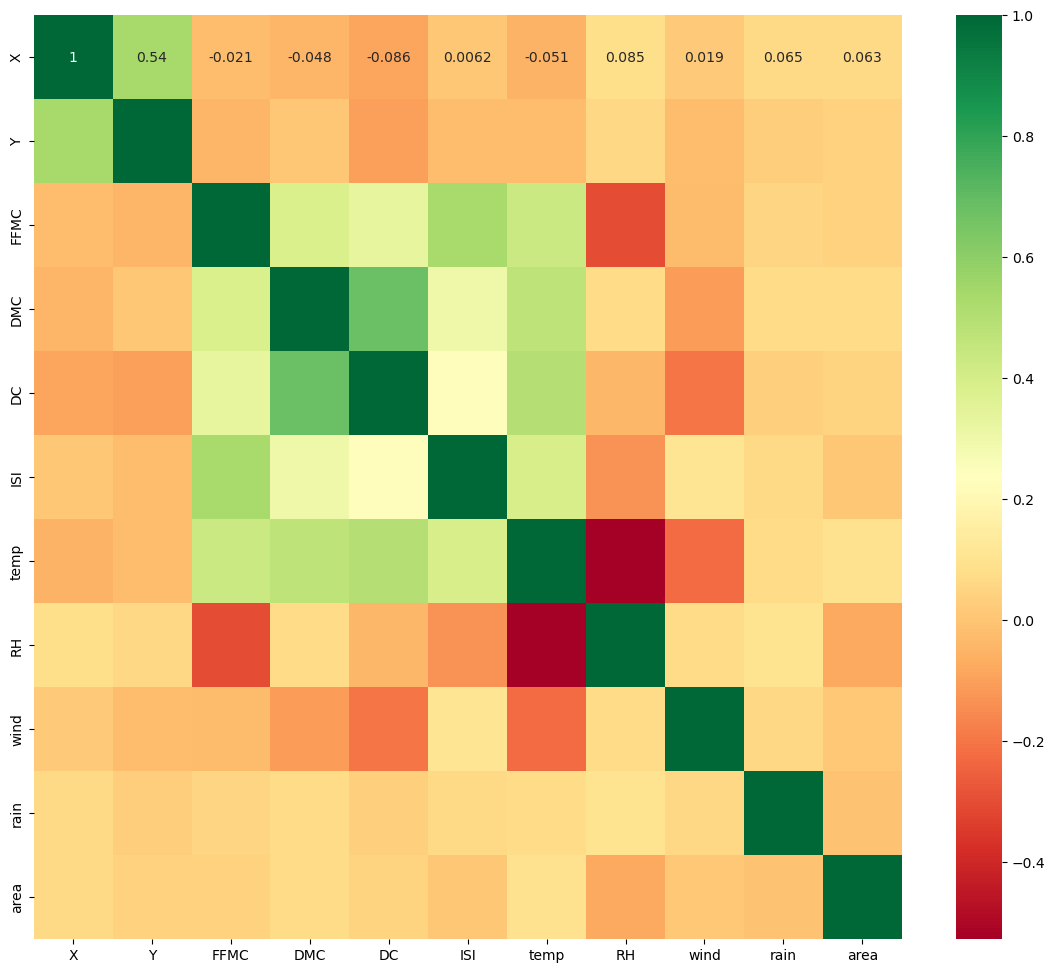

In [595]:
#Examine any correlation between variables. Will be helpful to ask inferential and for machine learning modelings.


columns = ["X", "Y", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]
heatmap_examine = df_copy[columns]

plt.figure(figsize=(14, 12))


sns.heatmap(heatmap_examine.corr(), annot=True, cmap="RdYlGn");

In [596]:
df_copy[columns].corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


<Axes: >

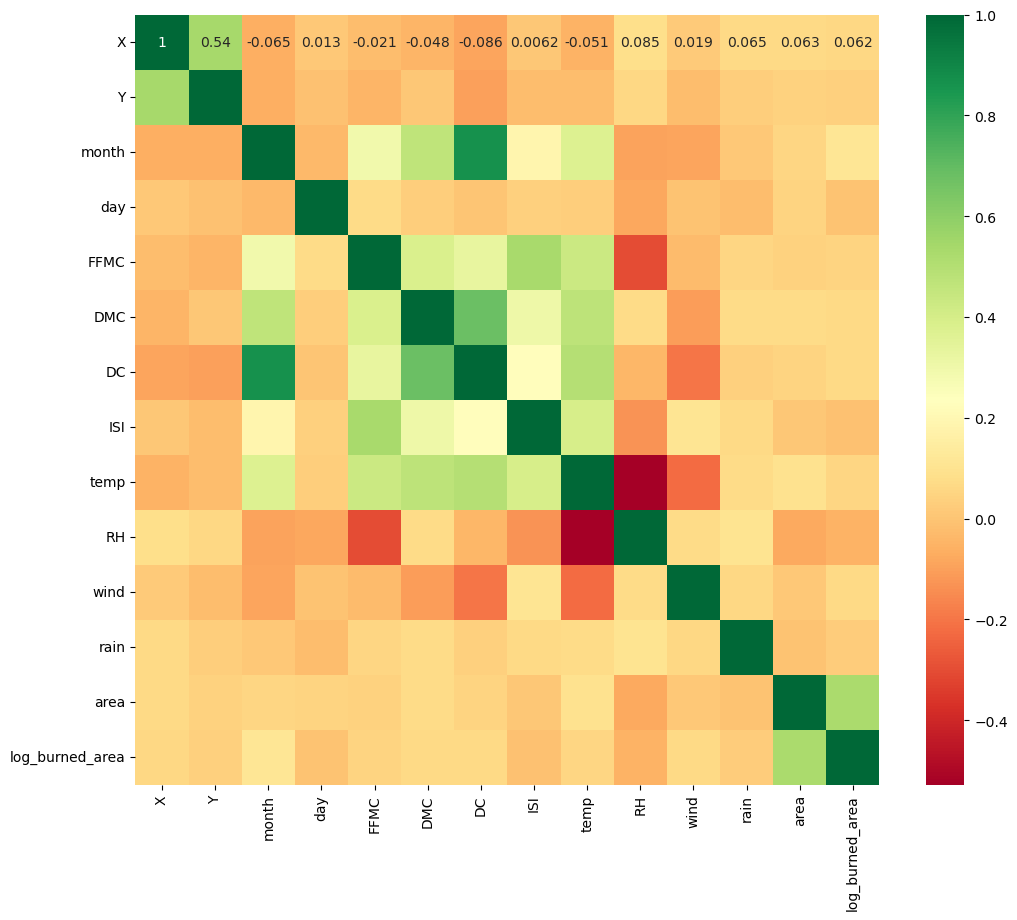

In [594]:
#correlation with day / month encoded numerically.

plt.figure(figsize=(12, 10))

sns.heatmap(df_sorted.corr(), annot=True, cmap="RdYlGn")

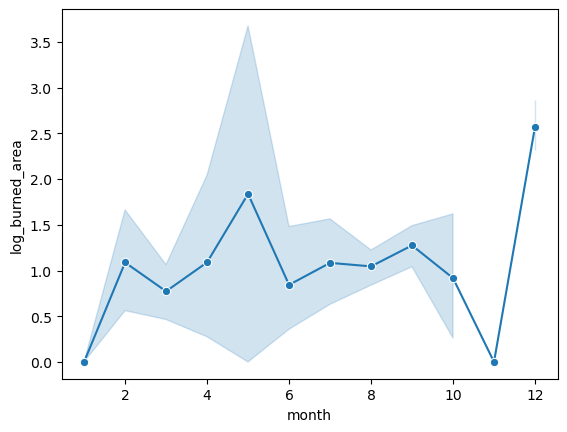

In [544]:
sns.lineplot(data=df_sorted, x="month", y="log_burned_area", marker="o");

In [599]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

# Section 2: Inferential Questions

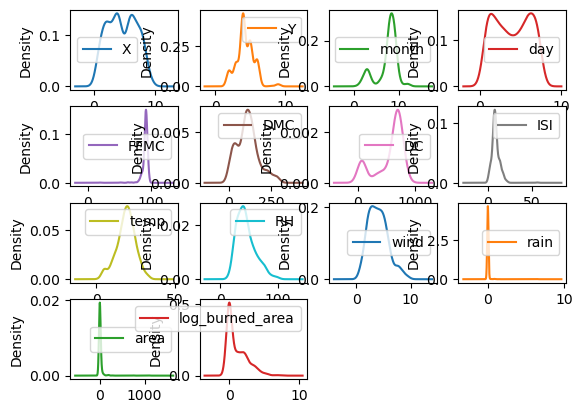

In [545]:
#Inspected the Dataset to see how the my features are distributed, nothing looks normally distributed.

df_copy.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False);

In [546]:
#KDE Function for beautified graphs.
def plot_kde(column, title, label, adj1, adj2):
    #Font dictionaries for custom styling
    
    font1 = {'family':'serif','color':'black','size':16}
    font2 = {'family':'serif','color':'black','size':14}
    #Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    #KDE plot
    sns.kdeplot(data=df_copy, x=column, color='#408EC6', label=label, fill=True)

    #Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
    plt.title(title, fontdict=font1)
    plt.xlabel(column, fontdict=font2)
    plt.ylabel('Probability Density', fontdict=font2)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)
    ax.set_facecolor('#f0f0f0')

    # Add a vertical line at the mean
    mean_points = df_copy[column].mean()
    plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
    plt.text(mean_points - adj1, adj2, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

    # Add legend
    plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

    plt.show()

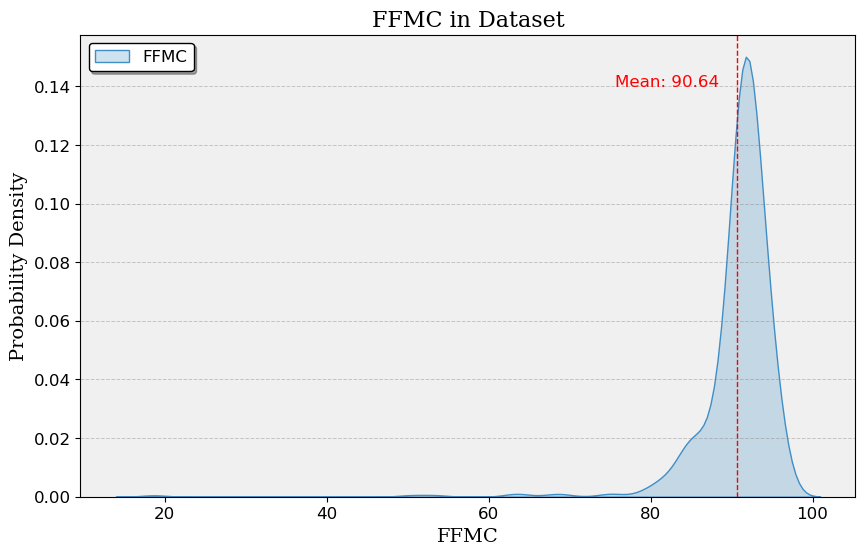

In [547]:
plot_kde("FFMC", "FFMC in Dataset", "FFMC", 15, 0.14)

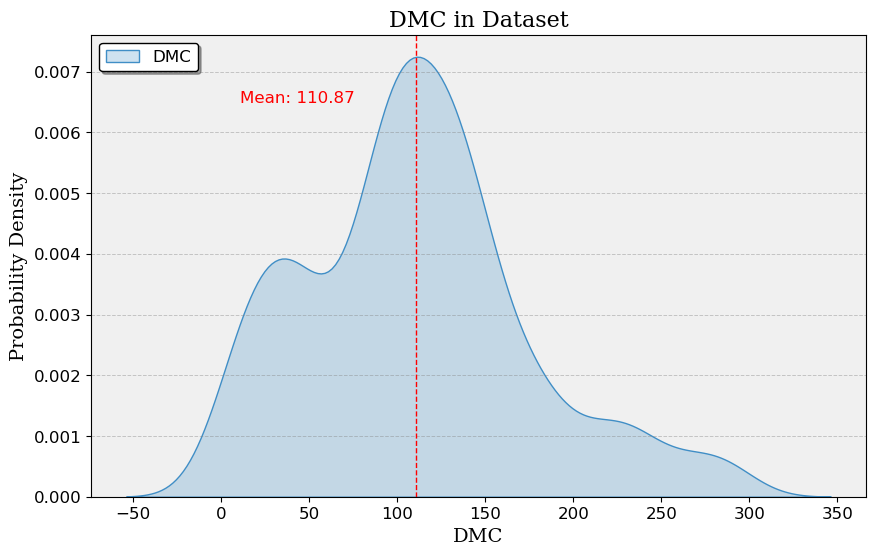

In [548]:
plot_kde("DMC", "DMC in Dataset", "DMC", 100, 0.0065 )

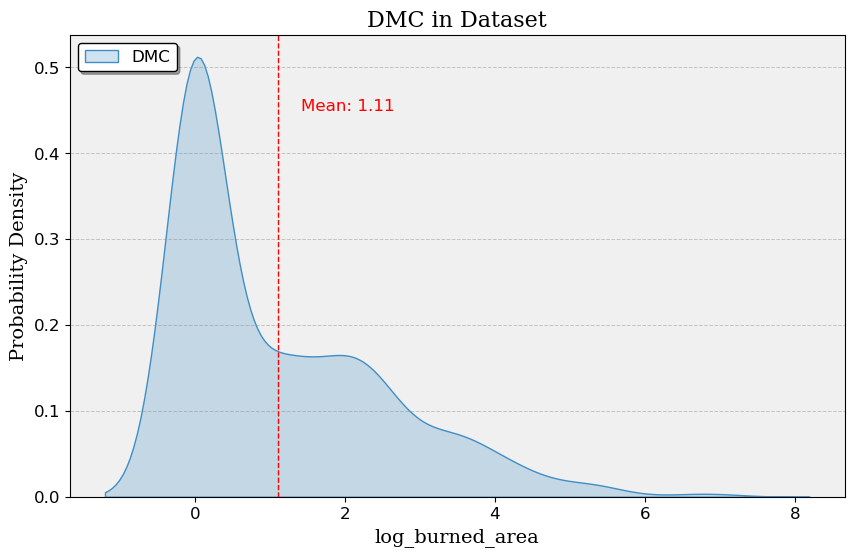

In [549]:
plot_kde("log_burned_area", "DMC in Dataset", "DMC", -0.3, 0.45 )

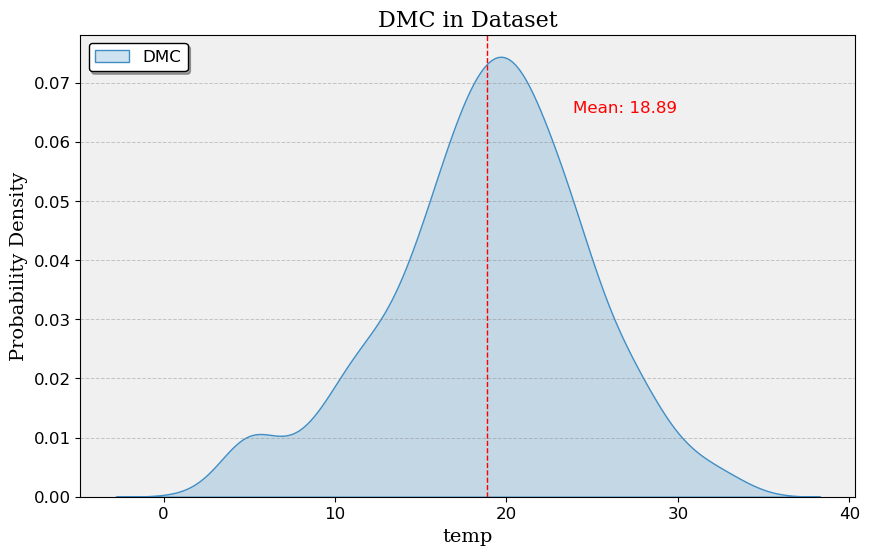

In [550]:
#only column that looks gaussian
plot_kde("temp", "DMC in Dataset", "DMC", -5, 0.065 )

## Normality Tests on Specific Columns

In [551]:
#Performing normality test log_burned_area

stat, p_val = stats.shapiro(df_copy['log_burned_area'])
p_val

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [552]:
#Performing normality test log_burned_area

stat, p_val = stats.shapiro(df_copy['temp'])
p_val

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


## Interpretation

Our data distribution is not normal and therefore we will use non normal testing going forward.

In [553]:
def mask_month(month):
    MASK_MONTH = df_copy['month'] == month
    return df_copy[MASK_MONTH]

def mask_day(day):
    MASK_MONTH = df_copy['day'] == day
    return df_copy[MASK_MONTH]
    
def test_outcome(pvalue, alpha=0.05):
    if pvalue < alpha:
        return "Reject the null hypothesis."
    else:
        return "Fail to reject the null hypothesis."


# def plot_kde_inferential(dataset1, dataset2)
#     plt.figure(figsize=(10, 6))

#     #KDE plot
#     sns.kdeplot(data=sample_processor_intel, x=sample_processor_intel, color='#F96167', label="Intel Processors", fill=True)
#     sns.kdeplot(data=sample_processor_amd, x=sample_processor_amd, color='#00246B', label="AMD Processors", fill=True)

#     #Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
#     plt.title("Prices of AMD and Intel Processor Laptops in Sample A", fontdict=font3)
#     plt.xlabel('Price', fontdict=font4)
#     plt.ylabel('Probability Density', fontdict=font4)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)


#     ax = plt.gca()
#     ax.set_facecolor('#f0f0f0')

#     # Add legend
#     plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
#     plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

#     plt.show()

### **<u>1. Is there a significant difference in the burn areas between different months (e.g., February vs. July)? (Mann-Whitney U Test)</u>**

$H_0$: _There is no difference in burn area between different months such as February and July._

$H_1$: _There is a difference in burn area between different months such as February and July._

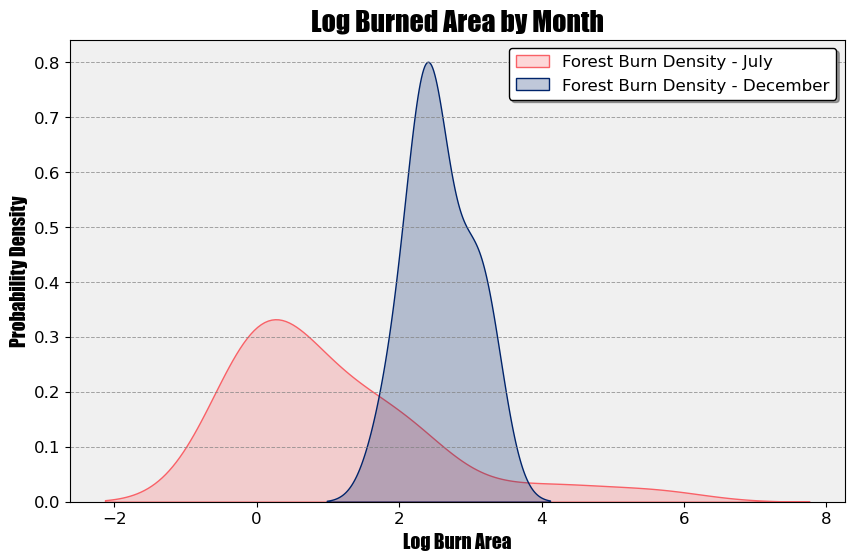

In [554]:
july_months = mask_month(7)['log_burned_area']
december_months = mask_month(12)['log_burned_area']

plt.figure(figsize=(10, 6))

font3 = {'family':'fantasy','color':'black','size':20}
font4= {'family':'fantasy','color':'black','size':14}

#KDE plot
sns.kdeplot(data=july_months, x=july_months, color='#F96167', label="Forest Burn Density - July", fill=True)
sns.kdeplot(data=december_months, x=december_months, color='#00246B', label="Forest Burn Density - December", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Log Burned Area by Month", fontdict=font3)
plt.xlabel('Log Burn Area', fontdict=font4)
plt.ylabel('Probability Density', fontdict=font4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [556]:
stat, p_val = mannwhitneyu(july_months, december_months)
print(p_val)

test_outcome(p_val, alpha=.05)

0.00038302011630034585


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is a statistically significant difference between the mean areas of forest burned in different months such as July and December, therefore warranting further research.

### **<u>1. Is there a significant difference in the burn areas for different days? (e.g., Tues, Weds, Thurs)? (Kruskal-Wallis H Test)</u>**

- $H_0$ : $\mu_{Tuesday} = \mu_{Wednesday} = \mu_{Thursday}$

- $H_a$ : $H_0$ is not true

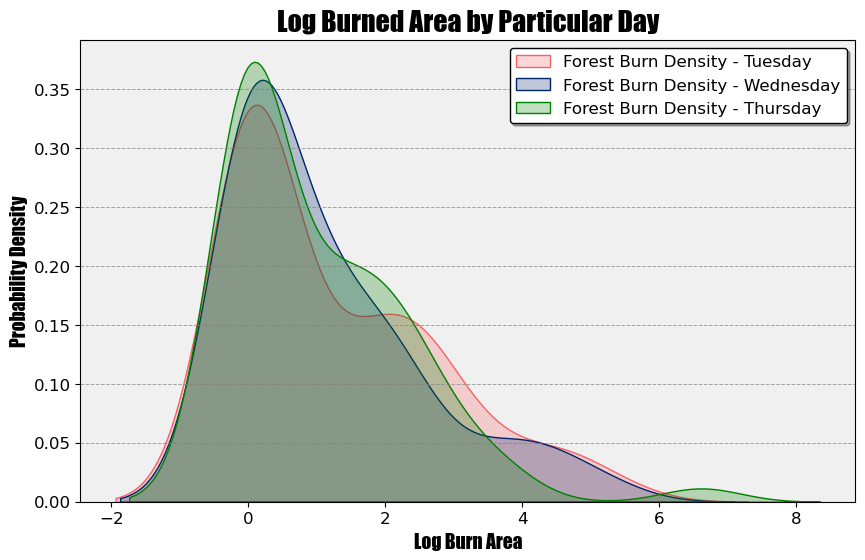

In [557]:
tuesday_burn = mask_day(3)['log_burned_area']
wednesday_burn = mask_day(4)['log_burned_area']
thursday_burn = mask_day(5)['log_burned_area']

plt.figure(figsize=(10, 6))

font3 = {'family':'fantasy','color':'black','size':20}
font4= {'family':'fantasy','color':'black','size':14}

#KDE plot
sns.kdeplot(data=tuesday_burn, x=tuesday_burn, color='#F96167', label="Forest Burn Density - Tuesday", fill=True)
sns.kdeplot(data=wednesday_burn, x=wednesday_burn, color='#00246B', label="Forest Burn Density - Wednesday", fill=True)
sns.kdeplot(data=thursday_burn, x=thursday_burn, color='green', label="Forest Burn Density - Thursday", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Log Burned Area by Particular Day", fontdict=font3)
plt.xlabel('Log Burn Area', fontdict=font4)
plt.ylabel('Probability Density', fontdict=font4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [558]:
#Test if any difference on log transformed burn area.
stat, p_value = kruskal(tuesday_burn, wednesday_burn, thursday_burn)
print(p_value)

test_outcome(p_value, alpha=alpha)

0.7282304039048604


'Fail to reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that our Null hypothesis was true and there is no statistical significance between the means of each group.

# Section 3: Machine Learning

First I will start off modeling very bare binimum models with no tuning and get an accuracy score.

In [559]:
df_copy

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_burned_area,damage_category
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000,No Damage
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000,No Damage
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000,No Damage
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000,No Damage
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000,No Damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871,Moderate Damage
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592,High Damage
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152,High Damage
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,No Damage


In [560]:
TARGET=['damage_category']

X, y = df_copy.drop(columns=["area", "log_burned_area","damage_category"], axis=1), df_copy[TARGET]

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

# Classification Testing

### Going to throw some darts at the wall and see what sticks for Categorized Burning areas.

In [610]:
def classification_model_test(model, X_train, y_train, X_test, y_test):
    # Fit the model with the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

    sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred),
            annot=True,
            cmap="coolwarm",
            square=True)


    print(classification_report(y_true=y_test, y_pred=y_pred))

    return f"Accuracy Score: {accuracy:.2f}"

                 precision    recall  f1-score   support

    High Damage       0.67      0.07      0.12        29
     Low Damage       0.00      0.00      0.00         8
Moderate Damage       0.00      0.00      0.00        45
      No Damage       0.46      0.89      0.61        74

       accuracy                           0.44       156
      macro avg       0.28      0.24      0.18       156
   weighted avg       0.34      0.44      0.31       156



'Accuracy Score: 0.44'

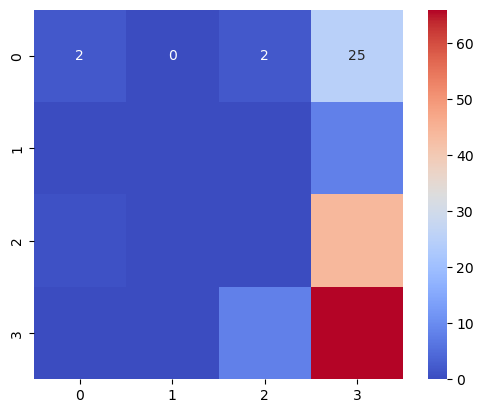

In [611]:
log_reg = LogisticRegression()
classification_model_test(log_reg, X_train, y_train, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.15      0.14      0.14        29
     Low Damage       0.11      0.12      0.12         8
Moderate Damage       0.28      0.33      0.31        45
      No Damage       0.49      0.45      0.47        74

       accuracy                           0.34       156
      macro avg       0.26      0.26      0.26       156
   weighted avg       0.35      0.34      0.34       156



'Accuracy Score: 0.34'

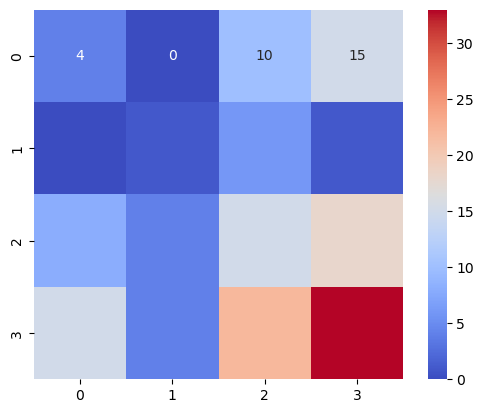

In [612]:
knn_model = KNeighborsClassifier()
classification_model_test(knn_model, X_train, y_train, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.21      0.24      0.22        29
     Low Damage       0.12      0.12      0.12         8
Moderate Damage       0.28      0.31      0.29        45
      No Damage       0.52      0.45      0.48        74

       accuracy                           0.35       156
      macro avg       0.28      0.28      0.28       156
   weighted avg       0.37      0.35      0.36       156



'Accuracy Score: 0.35'

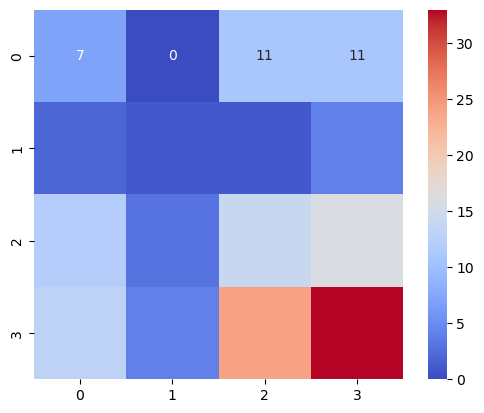

In [613]:
dtc_model = DecisionTreeClassifier()
classification_model_test(dtc_model, X_train, y_train, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.00      0.00      0.00        21
     Low Damage       0.00      0.00      0.00         5
Moderate Damage       0.00      0.00      0.00        27
      No Damage       0.49      1.00      0.66        51

       accuracy                           0.49       104
      macro avg       0.12      0.25      0.16       104
   weighted avg       0.24      0.49      0.32       104



'Accuracy Score: 0.49'

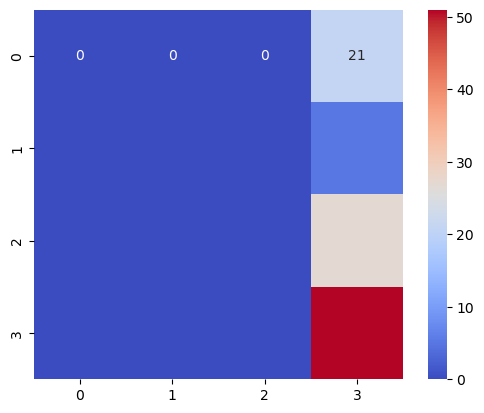

In [655]:
svc_model = SVC()
classification_model_test(svc_model, X_train, y_train, X_test, y_test)

In [656]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [660]:
print(X_train_resampled.value_counts())

month  day  FFMC       DMC         DC          ISI        temp       RH
9      5    92.800000  119.000000  783.500000  7.500000   16.800000  28    4
12     2    85.400000  25.400000   349.700000  2.600000   4.600000   21    4
3      7    91.700000  35.800000   80.800000   7.800000   17.000000  27    3
8      7    93.700000  231.100000  715.100000  8.400000   18.900000  64    3
6      6    91.100000  94.100000   232.100000  7.100000   19.200000  38    2
                                                                          ..
8      3    91.822491  146.772304  666.878474  12.458347  21.774772  51    1
            91.965703  149.779768  662.399826  13.408758  21.787791  53    1
            92.100000  152.600000  658.200000  14.300000  19.100000  53    1
                                                          19.847320  56    1
12     6    84.700000  26.700000   352.600000  4.100000   2.200000   59    1
Name: count, Length: 759, dtype: int64


                 precision    recall  f1-score   support

    High Damage       0.32      0.33      0.33        21
     Low Damage       0.00      0.00      0.00         5
Moderate Damage       0.28      0.30      0.29        27
      No Damage       0.60      0.57      0.59        51

       accuracy                           0.42       104
      macro avg       0.30      0.30      0.30       104
   weighted avg       0.43      0.42      0.43       104



'Accuracy Score: 0.42'

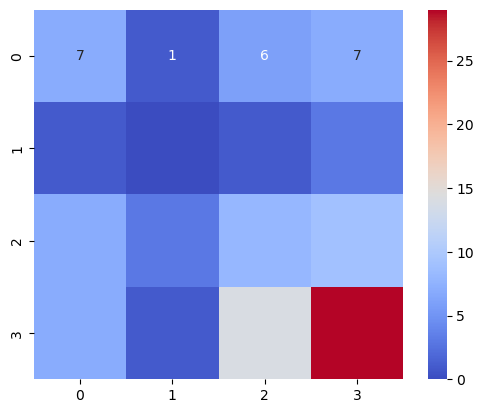

In [661]:
rfc_model = RandomForestClassifier()
classification_model_test(rfc_model, X_train_resampled, y_train_resampled, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.00      0.00      0.00        21
     Low Damage       0.07      0.80      0.13         5
Moderate Damage       0.24      0.19      0.21        27
      No Damage       0.74      0.27      0.40        51

       accuracy                           0.22       104
      macro avg       0.26      0.31      0.18       104
   weighted avg       0.43      0.22      0.26       104



'Accuracy Score: 0.22'

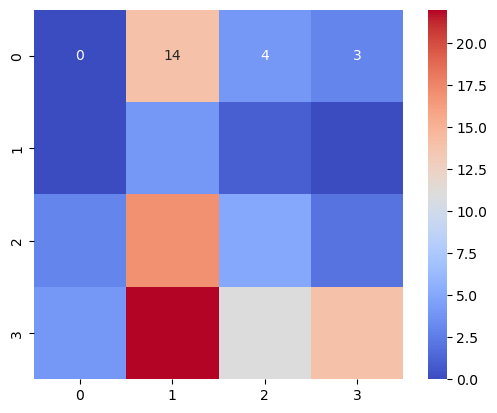

In [657]:
classification_model_test(svc_model, X_train_resampled, y_train_resampled, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.36      0.19      0.25        21
     Low Damage       0.25      0.20      0.22         5
Moderate Damage       0.29      0.30      0.29        27
      No Damage       0.54      0.65      0.59        51

       accuracy                           0.44       104
      macro avg       0.36      0.33      0.34       104
   weighted avg       0.42      0.44      0.43       104



'Accuracy Score: 0.44'

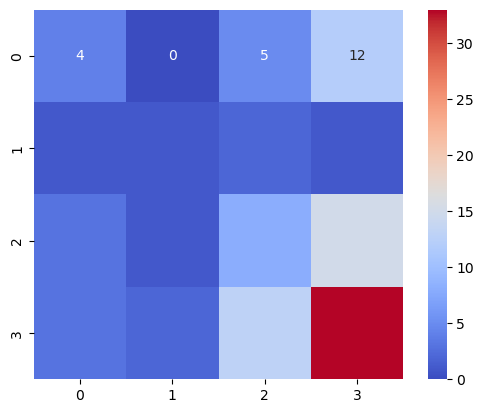

In [658]:
gbc_model = GradientBoostingClassifier()
classification_model_test(gbc_model, X_train, y_train, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.19      0.19      0.19        21
     Low Damage       0.33      0.20      0.25         5
Moderate Damage       0.28      0.26      0.27        27
      No Damage       0.47      0.51      0.49        51

       accuracy                           0.37       104
      macro avg       0.32      0.29      0.30       104
   weighted avg       0.36      0.37      0.36       104



'Accuracy Score: 0.37'

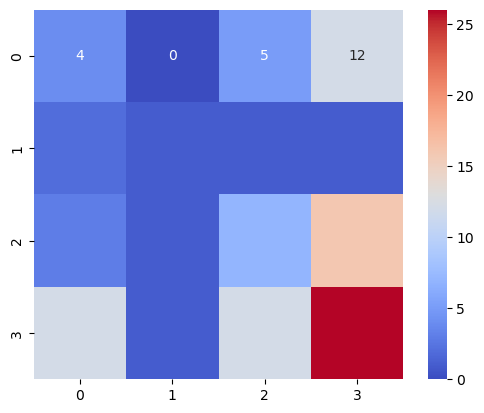

In [586]:
ada_model = AdaBoostClassifier()
classification_model_test(ada_model, X_train, y_train, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.29      0.10      0.14        21
     Low Damage       0.00      0.00      0.00         5
Moderate Damage       0.21      0.19      0.20        27
      No Damage       0.53      0.76      0.63        51

       accuracy                           0.44       104
      macro avg       0.26      0.26      0.24       104
   weighted avg       0.37      0.44      0.39       104



'Accuracy Score: 0.44'

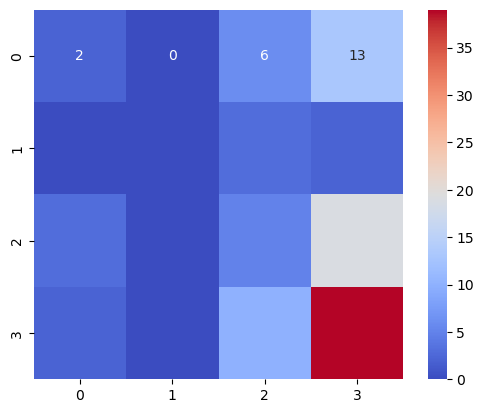

In [587]:
rfc_model = RandomForestClassifier()
classification_model_test(rfc_model, X_train, y_train, X_test, y_test)

                 precision    recall  f1-score   support

    High Damage       0.50      0.19      0.28        21
     Low Damage       0.00      0.00      0.00         5
Moderate Damage       0.32      0.26      0.29        27
      No Damage       0.53      0.76      0.62        51

       accuracy                           0.48       104
      macro avg       0.34      0.30      0.30       104
   weighted avg       0.44      0.48      0.44       104



'Accuracy Score: 0.48'

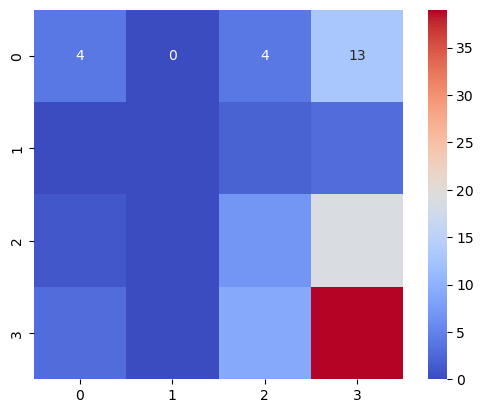

In [588]:
sgd_model = SGDClassifier()
classification_model_test(rfc_model, X_train, y_train, X_test, y_test)


                 precision    recall  f1-score   support

    High Damage       0.05      0.05      0.05        21
     Low Damage       0.08      0.20      0.11         5
Moderate Damage       0.32      0.41      0.36        27
      No Damage       0.59      0.43      0.50        51

       accuracy                           0.34       104
      macro avg       0.26      0.27      0.26       104
   weighted avg       0.39      0.34      0.35       104



'Accuracy Score: 0.34'

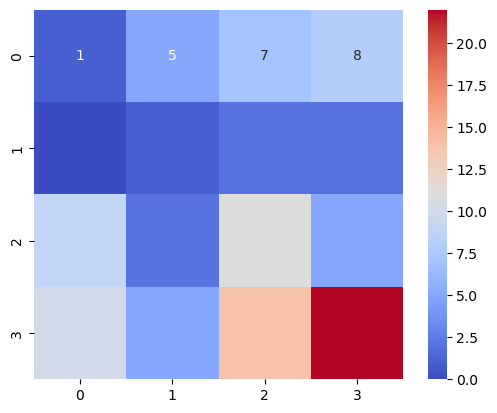

In [589]:
mnb_model = MultinomialNB()
classification_model_test(mnb_model, X_train, y_train, X_test, y_test)

### Takeaways

The models are 50% for best performance. This is pretty much guessing. Need to find way's to improve so it's not simply guessing.

Best performer: SVC

Worst performer: DecisionTree

At first, SGDclassifer (Stochastic Gradient Descent) performed the best with nearly 51% with no additional tuning or 'noise' reduction by only grabbing correlations with high correlations. Support Vector Classifier performed second best with 49%, while barebone decision tree classifier was awful at 33%. Improvements to be made

### Regression Analysis

In [617]:
# scaler = MinMaxScaler()
# df_copy['area_minmax_normal'] = scaler.fit_transform(df_copy[['area']])
# df_copy['area_minmax_log_area'] = scaler.fit_transform(df_copy[['log_burned_area']])

In [619]:
TARGET=['log_burned_area']

X_regression, y_regression = df_copy.drop(columns=["area", "log_burned_area","damage_category"], axis=1), df_copy[TARGET]

In [621]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, 
                                                    y_regression,
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [622]:
def regression_model_test(model, X_train, y_train, X_test, y_test):
    # Fit the model with the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and return the accuracy score
    var_score =  explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return "Score: {:.4f}% | Mean Absolute Error: {:.4f}".format(var_score, mae)

In [623]:
lin_reg = LinearRegression()
regression_model_test(lin_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg)

'Score: 0.0229% | Mean Absolute Error: 1.1653'

In [624]:
svr_reg = SVR()
regression_model_test(svr_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg)

'Score: -0.0087% | Mean Absolute Error: 1.1221'

In [625]:
knn_reg = KNeighborsRegressor()
regression_model_test(knn_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg)

'Score: -0.0295% | Mean Absolute Error: 1.1661'

In [626]:
cart_reg = DecisionTreeRegressor()
regression_model_test(cart_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg)

'Score: -0.9268% | Mean Absolute Error: 1.4649'

### Takeaways
Best performer: SVR?

Worst performer: DecisionTree

I have tried numerous different instances for regression without stripping data. I used the log transformed area column, applied MinMaxScaler, and unfortunately did not get great results. Classification seems the way to go with this data set. 

### I will focus on Classifiers.

In [370]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [627]:
grid_sgd = dict()

grid_sgd["penalty"] = ["l2", "l1", "elasticnet"]
grid_sgd["alpha"] = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid_sgd["max_iter"] = [100, 200, 300]
grid_sgd["learning_rate"] = ["constant", "optimal", "invscaling", "adaptive"]
grid_sgd["eta0"] = [0.01, 0.1, 1]


# grid_sgd["solver"] = ["newton-cg", "lbfgs", "liblinear", "saga", "sag"]
# grid_sgd["penalty"] = ["l2"]
# grid_sgd["C"] = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# grid_sgd["max_iter"]= [100, 200, 300]

In [628]:
search = RandomizedSearchCV(estimator=sgd_model,
                      param_distributions=grid_sgd,
                      scoring="accuracy",
                      n_jobs=-1,
                      cv=cv)

In [629]:
result = search.fit(X_train, y_train)

In [630]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))

> BEST SCORE: 		0.44882382382382385
> OPTIMAL PARAMETERS: 	{'penalty': 'l2', 'max_iter': 200, 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': 100}


In [642]:
grid01 = dict()

grid01["C"] = [1e-2, 1e-1, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid01["gamma"] = [1, 0.1, 0.01, 0.001]
grid01["kernel"] = ["linear"]

grid02 = dict()

grid02["C"] = [1e-2, 1e-1, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid02["gamma"] = [1, 0.1, 0.01, 0.001]
grid02["kernel"] = ["rbf"]

In [423]:
search = GridSearchCV(estimator=svc_model,
                      param_grid=grid01,
                      n_jobs=-1                            
                      )

In [424]:
result = search.fit(X_train, y_train)

In [489]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))

> BEST SCORE: 		0.4745812518366147
> OPTIMAL PARAMETERS: 	{'C': 1e-07, 'gamma': 1, 'kernel': 'linear'}


# Adjusting Features

In [692]:
df_copy['damage_category'].value_counts()

damage_category
No Damage          247
Moderate Damage    148
High Damage         95
Low Damage          27
Name: count, dtype: int64

In [710]:
#Adjust some columns to remove noise?
TARGET=['damage_category']

X, y = df_copy.drop(columns=["X", "Y", "area", "log_burned_area","damage_category", "wind", "rain"], axis=1), df_copy[TARGET]

In [720]:
#Trying smote - over /under sampling for equal classes - didnt seem to work well.

# Extract features and target
X = df_copy.drop(columns=['damage_category'])
y = df_copy['damage_category']

# Define the number of samples for 'No Damage' after under-sampling
target_no_damage_samples = int(len(y[y == 'No Damage']) * 0.5)  # e.g., 123

# Define the under-sampling strategy for RandomUnderSampler
under = RandomUnderSampler(sampling_strategy={'No Damage': target_no_damage_samples})

# Define the over-sampling strategy for SMOTE
# Ensure SMOTE automatically handles the other classes
over = SMOTE(sampling_strategy='auto')

# Create the pipeline
steps = [('under', under), ('over', over)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to your data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check the new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Initialize and train the SVC model
svc_model = SVC()
svc_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(accuracy)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Resampled class distribution: Counter({'High Damage': 148, 'Low Damage': 148, 'Moderate Damage': 148, 'No Damage': 148})
0.2692307692307692
Confusion Matrix:
[[ 4  8  6  3]
 [ 0  4  1  0]
 [ 0 19  6  2]
 [ 0 21 16 14]]

Classification Report:
                 precision    recall  f1-score   support

    High Damage       1.00      0.19      0.32        21
     Low Damage       0.08      0.80      0.14         5
Moderate Damage       0.21      0.22      0.21        27
      No Damage       0.74      0.27      0.40        51

       accuracy                           0.27       104
      macro avg       0.51      0.37      0.27       104
   weighted avg       0.62      0.27      0.32       104



In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [640]:
#Trying a MinMax scaler on features to see if any improvements

scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [669]:
#Trying a standard scaler on features to see if any improvements

standard_scale = StandardScaler()
X_train_standard = standard_scale.fit_transform(X_train)
X_test_standard = standard_scale.transform(X_test)

In [676]:
#See results by fitting the standard scaler x train data

result = search.fit(X_train_standard, y_train)

In [677]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))


> BEST SCORE: 		0.474545102593883
> OPTIMAL PARAMETERS: 	{'penalty': 'l2', 'max_iter': 200, 'learning_rate': 'invscaling', 'eta0': 0.01, 'alpha': 1}


In [678]:
search = RandomizedSearchCV(estimator=svc_model,
                      param_distributions=grid02,
                      scoring="accuracy",
                      n_jobs=-1,
                      cv=cv)

In [681]:
#See results by fitting the MinMax scaler x train data

result = search.fit(X_train_scaled, y_train)

In [682]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))

> BEST SCORE: 		0.474545102593883
> OPTIMAL PARAMETERS: 	{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


In [495]:
search = RandomizedSearchCV(estimator=svc_model,
                      param_distributions=grid02,
                      scoring="accuracy",
                      n_jobs=-1,
                      cv=cv)

In [496]:
result = search.fit(X_train, y_train)

In [497]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))

> BEST SCORE: 		0.474545102593883
> OPTIMAL PARAMETERS: 	{'kernel': 'linear', 'gamma': 1, 'C': 1e-06}


Assessment

The best test I was able to achieve was 50% with SVC. I further tried to use hyperparameter tuning, transforming my features with standard and MinMax scaler, log Transformation, using features that seemed like it had more signal than noise, but the class imbalances were too great. I tried using and applying some sampling techniques such as SMOTE, undersampling, but I could not seem to get it to work properly.